In [21]:
import os
import pathlib
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import random
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D,  MaxPool2D, Flatten, GlobalAveragePooling2D,  BatchNormalization, Layer, Add, AveragePooling2D, Normalization, Dropout

In [17]:
train_dir = "C:/Users/alexa/Documents/Master/Dataset/Train" #link need to be adapted to other persons file location
test_dir = "C:/Users/alexa/Documents/Master/guitar_data/all_guitar_data/test" #link need to be adapted to other persons file location
val_dir = "C:/Users/alexa/Documents/Master/Dataset/Val" #link need to be adapted to other persons file location
data_dir = pathlib.Path(train_dir)
class_names = np.array(sorted([item.name for item in data_dir.glob('*')]))
print(class_names)

['A' 'B' 'Background' 'C' 'D' 'E' 'F' 'G']


In [25]:
# Rescale data and create data generator instances
train_datagen = ImageDataGenerator(rescale=1/255.)
test_datagen = ImageDataGenerator(rescale=1/255.)

train_datagen_augmented = ImageDataGenerator(rescale=1/255.,
                                            width_shift_range=0.2,
                                            height_shift_range=0.2,
                                            zoom_range=0.2)

train_datagen_augmented2 = ImageDataGenerator(rescale=1/255.,
                                              width_shift_range=0.2,
                                              height_shift_range=0.2,
                                              zoom_range=0.2,
                                              rotation_range=30,
                                              shear_range=0.2,
                                              brightness_range=[-1, +1])

test_datagen_augmented = ImageDataGenerator(rescale=1/255.,
                                              width_shift_range=0.2,
                                              height_shift_range=0.2,
                                              zoom_range=0.2,
                                              rotation_range=30,
                                              shear_range=0.2,
                                              brightness_range=[-1, +1])

# Load data in from directories and turn into batches
train_data = train_datagen.flow_from_directory(train_dir,
                                              target_size=(224, 224),
                                              batch_size=32,
                                              class_mode='categorical')

train_data_augmented = train_datagen_augmented.flow_from_directory(train_dir,
                                                                  target_size=(224,224),
                                                                  batch_size=64,
                                                                  class_mode='categorical')
test_data = test_datagen.flow_from_directory(val_dir,
                                            target_size=(224, 224),
                                            batch_size=64,
                                            class_mode='categorical')

train_data_aug2 = train_datagen_augmented.flow_from_directory(train_dir,
                                                             target_size=(224,224),
                                                             batch_size=64,
                                                             color_mode='grayscale',
                                                             class_mode='categorical')

test_data2 = test_datagen.flow_from_directory(train_dir,
                                              target_size=(224,224), 
                                              batch_size=64, 
                                              color_mode='grayscale', 
                                              class_mode='categorical')

test_data3 = test_datagen_augmented.flow_from_directory(val_dir,
                                            target_size=(224, 224),
                                            batch_size=64,
                                            class_mode='categorical')

train_data_aug3 = train_datagen_augmented2.flow_from_directory(train_dir,
                                                               target_size=(224,224),
                                                               batch_size=64,
                                                               class_mode='categorical')

Found 1544 images belonging to 8 classes.
Found 1544 images belonging to 8 classes.
Found 388 images belonging to 8 classes.
Found 1544 images belonging to 8 classes.
Found 1544 images belonging to 8 classes.
Found 388 images belonging to 8 classes.
Found 1544 images belonging to 8 classes.


In [6]:
# Create model 
model_1 = Sequential([
    Conv2D(32, (5,5), activation='relu', input_shape=(224, 224, 3)), # filters, kernel_size
    Conv2D(32, (5,5), activation='relu'),
    MaxPool2D(), #pool_size=2, padding="valid"
    Conv2D(32, (5,5), activation='relu'),
    Conv2D(32, (5,5), activation='relu'),
    MaxPool2D(), #2
    Flatten(),
    Dense(25, activation='softmax') # 7 is number of classes
])

# Compile the model
model_1.compile(loss="categorical_crossentropy",
               optimizer=tf.keras.optimizers.Adam(),
               metrics=["accuracy"])

In [7]:
# Fit the model
history_1 = model_1.fit(train_data_augmented,
                       epochs=25,
                       steps_per_epoch=len(train_data_augmented),
                       validation_data=test_data,
                       validation_steps=len(test_data))

Epoch 1/25
32/32 [==============================] - 448s 14s/step - loss: 3.2529 - accuracy: 0.0525 - val_loss: 3.0049 - val_accuracy: 0.0620
Epoch 2/25
32/32 [==============================] - 438s 14s/step - loss: 2.6930 - accuracy: 0.1635 - val_loss: 2.4504 - val_accuracy: 0.2000
Epoch 3/25
32/32 [==============================] - 438s 14s/step - loss: 2.4132 - accuracy: 0.2380 - val_loss: 2.2731 - val_accuracy: 0.3200
Epoch 4/25
32/32 [==============================] - 439s 14s/step - loss: 2.2027 - accuracy: 0.2885 - val_loss: 2.3533 - val_accuracy: 0.2800
Epoch 5/25
32/32 [==============================] - 440s 14s/step - loss: 2.0826 - accuracy: 0.3185 - val_loss: 2.1781 - val_accuracy: 0.3240
Epoch 6/25
20/32 [=================>............] - ETA: 2:29 - loss: 1.9968 - accuracy: 0.3375

KeyboardInterrupt: 

In [11]:
# Evaluate on the test data
model_1.evaluate(test_data)

25/25 [==============================] - 217s 9s/step - loss: 0.3709 - accuracy: 0.8880


[0.370924711227417, 0.8879533410072327]

In [31]:
# Source:
# Bourke, D. (n.d.). 03. Convolutional Neural Networks and Computer Vision with TensorFlow: 
# 5. Evaluate the model. Zero to Mastery TensorFlow for Deep Learning. Retrieved October 16, 2023, from
# https://dev.mrdbourke.com/tensorflow-deep-learning/03_convolutional_neural_networks_in_tensorflow/#5-evaluate-the-model


# Plot validation and training
def plot_loss_curves(history):
    loss = history.history['loss']
    val_loss = history.history['val_loss']
    accuracy = history.history['accuracy']
    val_accuracy = history.history['val_accuracy']
    epochs = range(len(history.history['loss']))
    
    # Plot loss
    plt.plot(epochs, loss, label='training_loss')
    plt.plot(epochs, val_loss, label='val_loss')
    plt.title('Loss')
    plt.xlabel('Epochs')
    plt.legend()
    
    # Plot accuracy
    plt.figure()
    plt.plot(epochs, accuracy, label='training_accuracy')
    plt.plot(epochs, val_accuracy, label='val_accuracy')
    plt.title('Accuracy')
    plt.xlabel('Epochs')
    plt.legend();

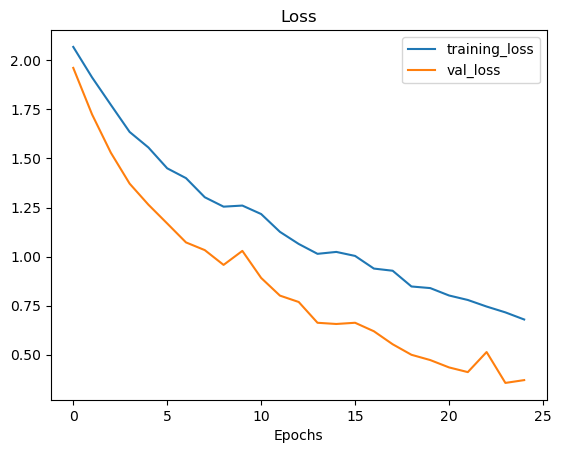

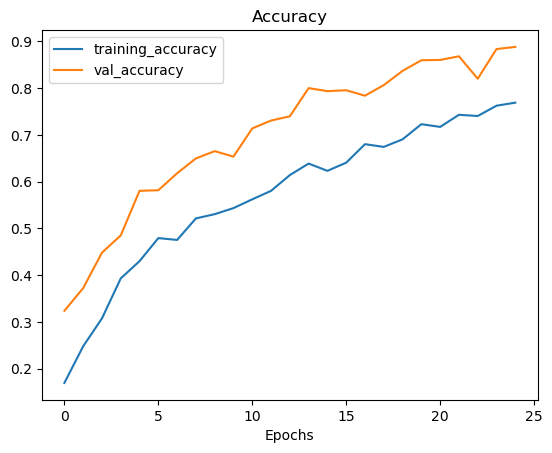

In [13]:
plot_loss_curves(history_1)

In [14]:
model_1.save_weights('model_1_large_new_weights4.h5')

In [17]:
# From: 
# Pedregosa, F., Varoquaux, G., Gramfort, A., Michel, V., Thirion, B., Grisel, O., Blondel, M., Prettenhofer, P., 
# Weiss, R., Dubourg, V., Vanderplas, J., Passos, A., Cournapeau, D., Brucher, M., Perrot, M., & Duchesnay, E. (2011). 
# Scikit-learn: Machine Learning in Python. Journal of Machine Learning Research, 12, 2825–2830.

# sklearn.metrics.classification_report. (n.d.). Scikit-learn. Retrieved December 17, 2023, 
# from https://scikit-learn.org/stable/modules/generated/sklearn.metrics.classification_report.html 

# sklearn.metrics.f1_score. (n.d.). Scikit-learn. Retrieved December 17, 2023, 
# from https://scikit-learn.org/stable/modules/generated/sklearn.metrics.f1_score.html 

# sklearn.metrics.precision_score. (n.d.). Scikit-learn. Retrieved December 17, 2023, 
# from https://scikit-learn.org/stable/modules/generated/sklearn.metrics.precision_score.html 

# sklearn.metrics.recall_score. (n.d.). Scikit-learn. Retrieved December 17, 2023,
# from https://scikit-learn.org/stable/modules/generated/sklearn.metrics.recall_score.html


from sklearn.metrics import recall_score
from sklearn.metrics import precision_score
from sklearn.metrics import f1_score
from sklearn.metrics import classification_report


pred = model_1.predict(test_data, batch_size=64)
pred = np.argmax(pred, axis=-1)

y_true = test_data.classes

#y_pred = np.rint(pred)
#labels = np.argmax(y_pred, axis=-1)

print(classification_report(y_true, pred, target_names=class_names))

25/25 [==============================] - 229s 9s/step
              precision    recall  f1-score   support

           A       0.13      0.13      0.13       195
           B       0.17      0.17      0.17       195
  Background       0.01      0.01      0.01        80
           C       0.17      0.16      0.16       234
           D       0.11      0.12      0.12       180
           E       0.14      0.15      0.15       202
           F       0.16      0.16      0.16       236
           G       0.11      0.09      0.10       222

    accuracy                           0.14      1544
   macro avg       0.13      0.13      0.13      1544
weighted avg       0.14      0.14      0.14      1544



In [29]:
# Source:
# Sahilsharma. (n.d.). Music-Genre-Classification/Plot_CM.py at master · sahilsharma884/Music-Genre-Classification. 
# GitHub. https://github.com/sahilsharma884/Music-Genre-Classification/blob/master/Plot_CM.py

import itertools


def plot_confusion_matrix(cm, classes, normalize=False,title='Confusion matrix', cmap=plt.cm.Blues):
    if normalize:
        cm=cm.astype('float')/cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print("Confusion matrix, without normalization")
        
    plt.imshow(cm, interpolation='nearest',cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks=np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation = 45)
    plt.yticks(tick_marks,classes)
    
    fmt='.2f' if normalize else 'd'
    thresh = cm.max()/2
    for i,j in itertools.product(range(cm.shape[0]),range(cm.shape[1])):
        plt.text(j,i,format(cm[i,j],fmt),
                horizontalalignment="center",
                color="white" if cm[i,j] > thresh else "black")
    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

25/25 [==============================] - 215s 9s/step
Confusion Matrix
Normalized confusion matrix


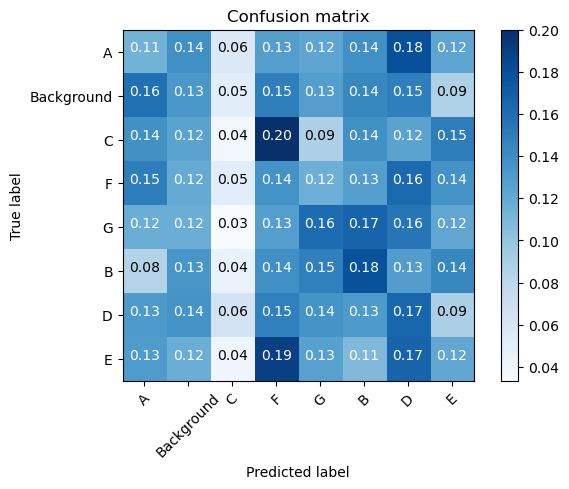

In [21]:
# Source:
# Sahilsharma. (n.d.). Music-Genre-Classification/CNN_Model.py at master · sahilsharma884/Music-Genre-Classification. 
# GitHub. https://github.com/sahilsharma884/Music-Genre-Classification/blob/master/CNN_Model.py

from sklearn.metrics import confusion_matrix
from collections import OrderedDict

Y_pred=model_1.predict(test_data)
y_pred=np.argmax(Y_pred,axis=1)
print('Confusion Matrix')
cm=confusion_matrix(test_data.classes,y_pred)
genres={'A' : 0, 'A#' : 1, 'A#m' : 2, 'Am' : 3, 'B' : 4, 'Background' : 5, 'Bm' : 6, 'C' : 7, 'C#' : 8, 'C#m' : 9, 'Cm' : 10, 'D' : 11, 'D#' : 12, 'D#m' : 13, 'Dm' : 14, 'E' : 15, 'Em' : 16, 'F' : 17, 'F#' : 18, 'F#m' : 19, 'Fm' :20, 'G' : 21, 'G#' : 22, 'G#m' : 23, 'Gm' : 24}
keys = OrderedDict(sorted(genres.items(), key=lambda t: t[1])).keys()

plot_confusion_matrix(cm,keys,normalize=True)
plt.show()

In [15]:
from keras.models import load_model

#Save the trained model to an Keras file
model_1.save("Models/model_1.keras")

#Save the trained model to SavedModel format
tf.saved_model.save(model_1, "Models/model_1")

INFO:tensorflow:Assets written to: Models/model_1\assets


INFO:tensorflow:Assets written to: Models/model_1\assets


In [16]:
tf.keras.saving.save_model(model_1,"C:/Users/alexa/Documents/Master/TestModel", save_format="keras")

INFO:tensorflow:Assets written to: C:/Users/alexa/Documents/Master/TestModel\assets


INFO:tensorflow:Assets written to: C:/Users/alexa/Documents/Master/TestModel\assets


In [17]:
tf.keras.saving.save_model(model_1,"C:/Users/alexa/Documents/Master/TestModel2", save_format="tf")

INFO:tensorflow:Assets written to: C:/Users/alexa/Documents/Master/TestModel2\assets


INFO:tensorflow:Assets written to: C:/Users/alexa/Documents/Master/TestModel2\assets


In [13]:
model_json = model_1.to_json()
with open('model_architecture.json','w') as json_file:
    json_file.write(model_json)
model_1.save_weights('model_1_weights.h5')

In [12]:
from tensorflow.keras.applications.vgg16 import VGG16
from tensorflow.keras.preprocessing import image
from tensorflow.keras.applications.vgg16 import preprocess_input

In [16]:
model_2 = Sequential()
model_2.add(Conv2D(input_shape=(224,224,3),filters=64,kernel_size=(3,3),padding="same",activation="relu"))
model_2.add(Conv2D(filters=64, kernel_size=(3,3), padding="same", activation="relu"))
model_2.add(MaxPool2D(pool_size=(2,2), strides=(2,2)))
model_2.add(Conv2D(filters=128, kernel_size=(3,3), padding="same", activation="relu"))
model_2.add(Conv2D(filters=128, kernel_size=(3,3), padding="same", activation="relu"))
model_2.add(MaxPool2D(pool_size=(2,2), strides=(2,2)))
model_2.add(Conv2D(filters=256, kernel_size=(3,3), padding="same", activation="relu"))
model_2.add(Conv2D(filters=256, kernel_size=(3,3), padding="same", activation="relu"))
model_2.add(Conv2D(filters=256, kernel_size=(3,3), padding="same", activation="relu"))
model_2.add(MaxPool2D(pool_size=(2,2), strides=(2,2)))
model_2.add(Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"))
model_2.add(Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"))
model_2.add(Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"))
model_2.add(MaxPool2D(pool_size=(2,2), strides=(2,2)))
model_2.add(Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"))
model_2.add(Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"))
model_2.add(Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"))
model_2.add(MaxPool2D(pool_size=(2,2), strides=(2,2)))
model_2.add(Flatten())
model_2.add(Dense(units=256, activation="relu"))
model_2.add(Dense(units=128, activation="relu"))
model_2.add(Dense(units=8, activation="softmax"))

In [17]:
model_2.compile(loss="categorical_crossentropy",
               optimizer=tf.keras.optimizers.Adam(learning_rate=0.01),
               metrics=["accuracy"])

In [18]:
history_2 = model_2.fit(train_data_augmented, 
                       epochs=25,
                       steps_per_epoch=len(train_data_augmented),
                       validation_data=test_data,
                       validation_steps=len(test_data))

Epoch 1/25
25/25 [==============================] - 825s 33s/step - loss: 46530012.0000 - accuracy: 0.1256 - val_loss: 358.5636 - val_accuracy: 0.1263
Epoch 2/25
25/25 [==============================] - 830s 33s/step - loss: 1897.3536 - accuracy: 0.1308 - val_loss: 291.2923 - val_accuracy: 0.1289
Epoch 3/25
25/25 [==============================] - 825s 33s/step - loss: 1237.0726 - accuracy: 0.1231 - val_loss: 5.8838 - val_accuracy: 0.1521
Epoch 4/25
25/25 [==============================] - 824s 33s/step - loss: 17.9405 - accuracy: 0.1269 - val_loss: 2.0857 - val_accuracy: 0.1495
Epoch 5/25
25/25 [==============================] - 822s 33s/step - loss: 2.0824 - accuracy: 0.1516 - val_loss: 2.0756 - val_accuracy: 0.1495
Epoch 6/25
25/25 [==============================] - 822s 33s/step - loss: 2.0731 - accuracy: 0.1516 - val_loss: 2.0682 - val_accuracy: 0.1495
Epoch 7/25
25/25 [==============================] - 822s 33s/step - loss: 2.0662 - accuracy: 0.1516 - val_loss: 2.0619 - val_accur

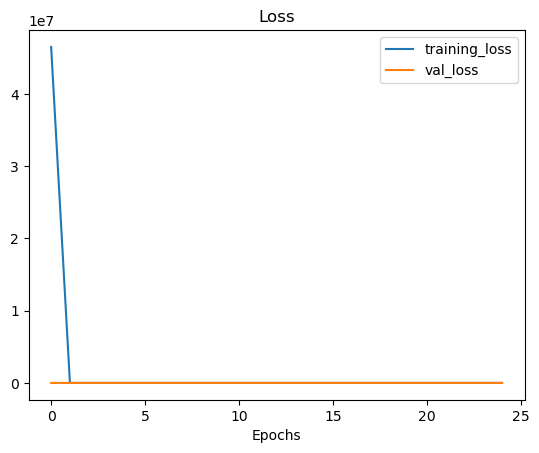

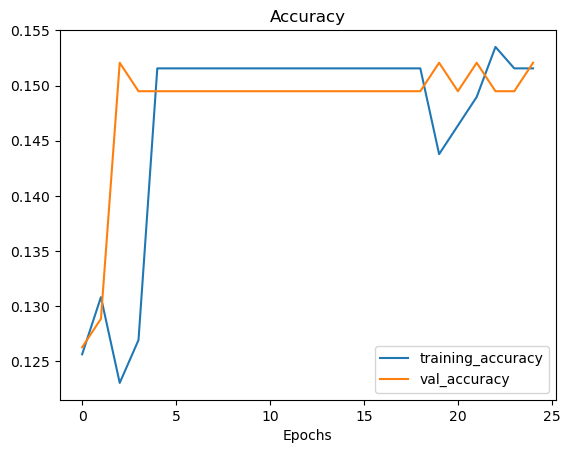

In [19]:
# improvements:
# faster learning rate
# different model
plot_loss_curves(history_2)

In [20]:
model_2.evaluate(test_data)

7/7 [==============================] - 67s 9s/step - loss: 2.0443 - accuracy: 0.1521


[2.044271230697632, 0.1520618498325348]

In [23]:
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score
from sklearn.metrics import f1_score
from sklearn.metrics import classification_report


pred = model_2.predict(test_data, batch_size=32)
pred = np.argmax(pred, axis=-1)

y_true = test_data.classes

#y_pred = np.rint(pred)
#labels = np.argmax(y_pred, axis=-1)

print(classification_report(y_true, pred, target_names=class_names))

7/7 [==============================] - 72s 10s/step
              precision    recall  f1-score   support

           A       0.00      0.00      0.00        49
           B       0.00      0.00      0.00        49
  Background       0.00      0.00      0.00        20
           C       0.00      0.00      0.00        58
           D       0.00      0.00      0.00        45
           E       0.00      0.00      0.00        50
           F       0.15      1.00      0.26        59
           G       0.00      0.00      0.00        58

    accuracy                           0.15       388
   macro avg       0.02      0.12      0.03       388
weighted avg       0.02      0.15      0.04       388



C:\Users\alexa\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\alexa\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\alexa\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [24]:
model_2.save_weights('vgg16_weights.h5')

In [4]:
loaded_model_1 = tf.keras.models.load_model("Models/model_1.keras")

In [16]:
import itertools

def plot_confusion_matrix(cm, classes, normalize=False,title='Confusion matrix', cmap=plt.cm.Blues):
    if normalize:
        cm=cm.astype('float')/cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print("Confusion matrix, without normalization")
        
    plt.imshow(cm, interpolation='nearest',cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks=np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation = 45)
    plt.yticks(tick_marks,classes)
    
    fmt='.2f' if normalize else 'd'
    thresh = cm.max()/2
    for i,j in itertools.product(range(cm.shape[0]),range(cm.shape[1])):
        plt.text(j,i,format(cm[i,j],fmt),
                horizontalalignment="center",
                color="white" if cm[i,j] > thresh else "black")
    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

7/7 [==============================] - 70s 9s/step
Confusion Matrix
Normalized confusion matrix


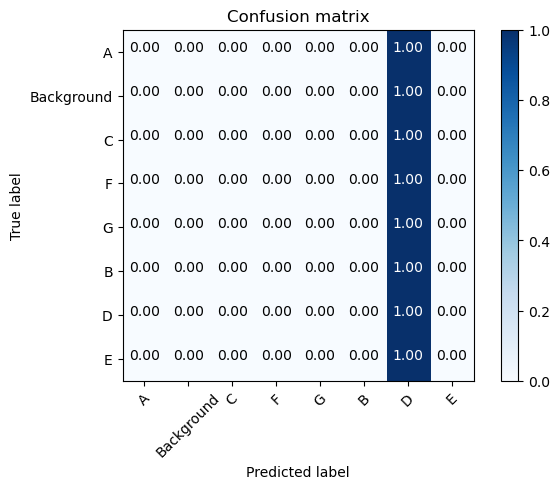

In [26]:
from sklearn.metrics import confusion_matrix
from collections import OrderedDict

Y_pred=model_2.predict(test_data)
y_pred=np.argmax(Y_pred,axis=1)
print('Confusion Matrix')
cm=confusion_matrix(test_data.classes,y_pred)
genres={'A':0, 'Background':1, 'C':2, 'F':3, 'G':4, 'B':5, 'D':6, 'E':7}
keys = OrderedDict(sorted(genres.items(), key=lambda t: t[1])).keys()

plot_confusion_matrix(cm,keys,normalize=True)
plt.show()

In [27]:
model_3 = Sequential([
    Conv2D(32, (5,5), activation='relu', input_shape=(224, 224, 3)), # filters, kernel_size
    Conv2D(32, (5,5), activation='relu'),
    MaxPool2D(), #pool_size=2, padding="valid"
    Conv2D(32, (5,5), activation='relu'),
    Conv2D(32, (5,5), activation='relu'),
    MaxPool2D(), #2
    Conv2D(32, (5,5), activation='relu'),
    Conv2D(32, (5,5), activation='relu'),
    MaxPool2D(),
    Conv2D(32, (5,5), activation='relu'),
    Conv2D(32, (5,5), activation='relu'),
    MaxPool2D(),
    Flatten(),
    Dense(8, activation='softmax') # 7 is number of classes
])

# Compile the model
model_3.compile(loss="categorical_crossentropy",
               optimizer=tf.keras.optimizers.Adam(),
               metrics=["accuracy"])

In [28]:
# Fit the model
history_3 = model_3.fit(train_data_augmented,
                       epochs=25,
                       steps_per_epoch=len(train_data_augmented),
                       validation_data=test_data,
                       validation_steps=len(test_data))

Epoch 1/25
25/25 [==============================] - 362s 14s/step - loss: 2.0710 - accuracy: 0.1354 - val_loss: 2.0541 - val_accuracy: 0.1211
Epoch 2/25
25/25 [==============================] - 361s 15s/step - loss: 2.0563 - accuracy: 0.1574 - val_loss: 2.0600 - val_accuracy: 0.1521
Epoch 3/25
25/25 [==============================] - 360s 14s/step - loss: 2.0415 - accuracy: 0.1645 - val_loss: 2.0491 - val_accuracy: 0.1572
Epoch 4/25
25/25 [==============================] - 361s 14s/step - loss: 2.0328 - accuracy: 0.1703 - val_loss: 2.0519 - val_accuracy: 0.1314
Epoch 5/25
25/25 [==============================] - 363s 15s/step - loss: 2.0085 - accuracy: 0.1548 - val_loss: 2.0406 - val_accuracy: 0.1418
Epoch 6/25
25/25 [==============================] - 363s 14s/step - loss: 1.9874 - accuracy: 0.1716 - val_loss: 1.9982 - val_accuracy: 0.1057
Epoch 7/25
25/25 [==============================] - 362s 14s/step - loss: 1.9525 - accuracy: 0.1801 - val_loss: 1.9954 - val_accuracy: 0.2397
Epoch 

In [29]:
model_3.evaluate(test_data)

7/7 [==============================] - 48s 7s/step - loss: 0.8799 - accuracy: 0.6753


[0.8799159526824951, 0.6752577424049377]

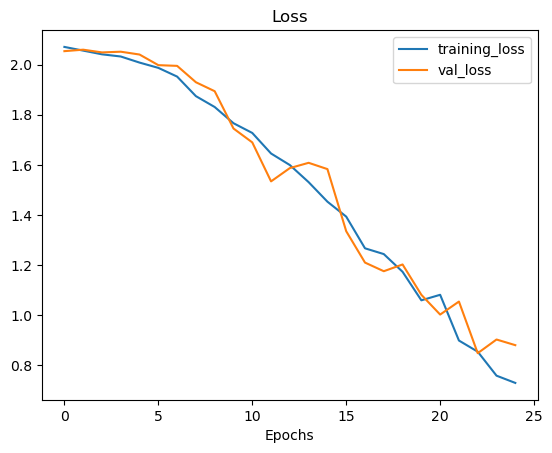

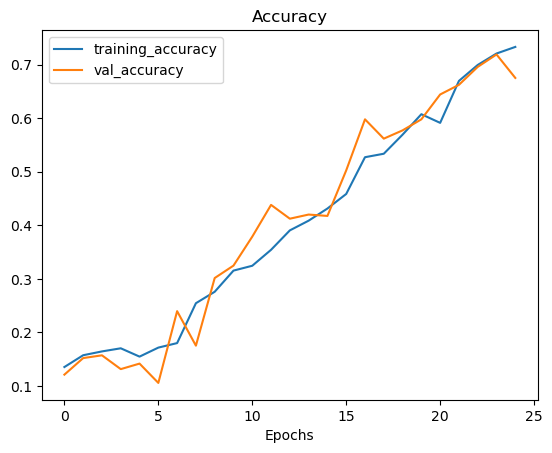

In [30]:
plot_loss_curves(history_3)

In [31]:
pred = model_3.predict(test_data, batch_size=32)
pred = np.argmax(pred, axis=-1)

y_true = test_data.classes

#y_pred = np.rint(pred)
#labels = np.argmax(y_pred, axis=-1)

print(classification_report(y_true, pred, target_names=class_names))

7/7 [==============================] - 45s 6s/step
              precision    recall  f1-score   support

           A       0.06      0.06      0.06        49
           B       0.19      0.18      0.19        49
  Background       0.00      0.00      0.00        20
           C       0.16      0.24      0.19        58
           D       0.17      0.20      0.18        45
           E       0.10      0.10      0.10        50
           F       0.17      0.14      0.15        59
           G       0.17      0.12      0.14        58

    accuracy                           0.14       388
   macro avg       0.13      0.13      0.13       388
weighted avg       0.14      0.14      0.14       388



In [32]:
model_3.save_weights('model3_weights.h5')

7/7 [==============================] - 46s 6s/step
Confusion Matrix
Normalized confusion matrix


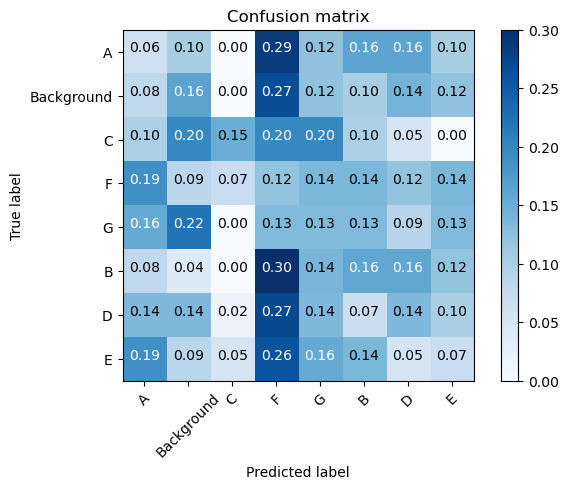

In [33]:
Y_pred=model_3.predict(test_data)
y_pred=np.argmax(Y_pred,axis=1)
print('Confusion Matrix')
cm=confusion_matrix(test_data.classes,y_pred)
genres={'A':0, 'Background':1, 'C':2, 'F':3, 'G':4, 'B':5, 'D':6, 'E':7}
keys = OrderedDict(sorted(genres.items(), key=lambda t: t[1])).keys()

plot_confusion_matrix(cm,keys,normalize=True)
plt.show()

In [23]:
# From:
# JIANG, R. (2021). Implementing resnet-18 using keras [Accessed 07-12-2023].
# https://www.kaggle.com/code/songrise/implementing-resnet-18-using-keras/notebook


"""
ResNet-18
Reference:
[1] K. He et al. Deep Residual Learning for Image Recognition. CVPR, 2016
[2] K. He, X. Zhang, S. Ren, and J. Sun. Delving deep into rectifiers:
Surpassing human-level performance on imagenet classification. In
ICCV, 2015.
"""

from keras.models import Model


class ResnetBlock(Model):
    """
    A standard resnet block.
    """

    def __init__(self, channels: int, down_sample=False):
        """
        channels: same as number of convolution kernels
        """
        super().__init__()

        self.__channels = channels
        self.__down_sample = down_sample
        self.__strides = [2, 1] if down_sample else [1, 1]

        KERNEL_SIZE = (3, 3)
        # use He initialization, instead of Xavier (a.k.a 'glorot_uniform' in Keras), as suggested in [2]
        INIT_SCHEME = "he_normal"

        self.conv_1 = Conv2D(self.__channels, strides=self.__strides[0],
                             kernel_size=KERNEL_SIZE, padding="same", kernel_initializer=INIT_SCHEME)
        self.bn_1 = BatchNormalization()
        self.conv_2 = Conv2D(self.__channels, strides=self.__strides[1],
                             kernel_size=KERNEL_SIZE, padding="same", kernel_initializer=INIT_SCHEME)
        self.bn_2 = BatchNormalization()
        self.merge = Add()

        if self.__down_sample:
            # perform down sampling using stride of 2, according to [1].
            self.res_conv = Conv2D(
                self.__channels, strides=2, kernel_size=(1, 1), kernel_initializer=INIT_SCHEME, padding="same")
            self.res_bn = BatchNormalization()

    def call(self, inputs):
        res = inputs

        x = self.conv_1(inputs)
        x = self.bn_1(x)
        x = tf.nn.relu(x)
        x = self.conv_2(x)
        x = self.bn_2(x)

        if self.__down_sample:
            res = self.res_conv(res)
            res = self.res_bn(res)

        # if not perform down sample, then add a shortcut directly
        x = self.merge([x, res])
        out = tf.nn.relu(x)
        return out


class ResNet18(Model):

    def __init__(self, num_classes, **kwargs):
        """
            num_classes: number of classes in specific classification task.
        """
        super().__init__(**kwargs)
        self.conv_1 = Conv2D(64, (7, 7), strides=2,
                             padding="same", kernel_initializer="he_normal")
        self.init_bn = BatchNormalization()
        self.pool_2 = MaxPool2D(pool_size=(2, 2), strides=2, padding="same")
        self.res_1_1 = ResnetBlock(64)
        self.res_1_2 = ResnetBlock(64)
        self.res_2_1 = ResnetBlock(128, down_sample=True)
        self.res_2_2 = ResnetBlock(128)
        self.res_3_1 = ResnetBlock(256, down_sample=True)
        self.res_3_2 = ResnetBlock(256)
        self.res_4_1 = ResnetBlock(512, down_sample=True)
        self.res_4_2 = ResnetBlock(512)
        self.avg_pool = GlobalAveragePooling2D()
        self.flat = Flatten()
        self.fc = Dense(num_classes, activation="softmax")

    def call(self, inputs):
        out = self.conv_1(inputs)
        out = self.init_bn(out)
        out = tf.nn.relu(out)
        out = self.pool_2(out)
        for res_block in [self.res_1_1, self.res_1_2, self.res_2_1, self.res_2_2, self.res_3_1, self.res_3_2, self.res_4_1, self.res_4_2]:
            out = res_block(out)
        out = self.avg_pool(out)
        out = self.flat(out)
        out = self.fc(out)
        return out

In [22]:
model_4 = ResNet18(8)
model_4.build(input_shape = (None,224,224,3))


model_4.compile(optimizer = "adam",loss='categorical_crossentropy', metrics=["accuracy"]) 
model_4.summary()

NameError: name 'ResNet18' is not defined

In [8]:
from keras.callbacks import EarlyStopping

#es = EarlyStopping(patience= 8, restore_best_weights=True, monitor="val_accuracy")


history_4 = model_4.fit(train_data_augmented, steps_per_epoch=len(train_data_augmented), epochs=50, validation_data=test_data)

Epoch 1/50
25/25 [==============================] - 378s 15s/step - loss: 1.7377 - accuracy: 0.4385 - val_loss: 14255.9111 - val_accuracy: 0.0515
Epoch 2/50
25/25 [==============================] - 457s 18s/step - loss: 1.0392 - accuracy: 0.6308 - val_loss: 922.6627 - val_accuracy: 0.1495
Epoch 3/50
25/25 [==============================] - 355s 14s/step - loss: 0.6681 - accuracy: 0.7707 - val_loss: 252.1392 - val_accuracy: 0.0284
Epoch 4/50
25/25 [==============================] - 357s 14s/step - loss: 0.5806 - accuracy: 0.8044 - val_loss: 67.3218 - val_accuracy: 0.1340
Epoch 5/50
25/25 [==============================] - 336s 13s/step - loss: 0.5982 - accuracy: 0.7902 - val_loss: 64.7634 - val_accuracy: 0.1495
Epoch 6/50
25/25 [==============================] - 338s 14s/step - loss: 0.3473 - accuracy: 0.8789 - val_loss: 8.2107 - val_accuracy: 0.1675
Epoch 7/50
25/25 [==============================] - 334s 13s/step - loss: 0.2119 - accuracy: 0.9223 - val_loss: 5.8167 - val_accuracy: 0.1

In [9]:
model_4.evaluate(test_data)

7/7 [==============================] - 45s 6s/step - loss: 0.7031 - accuracy: 0.8144


[0.7031311392784119, 0.8144329786300659]

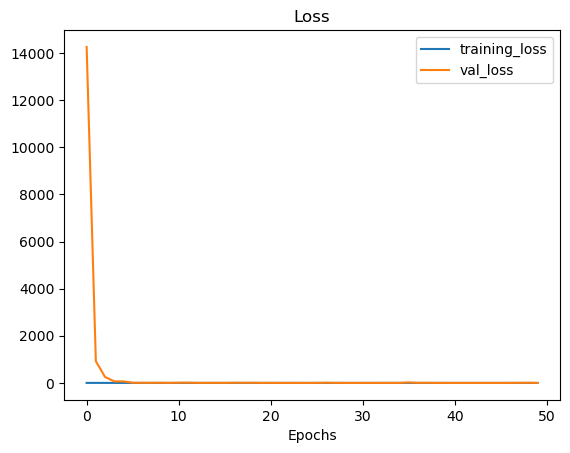

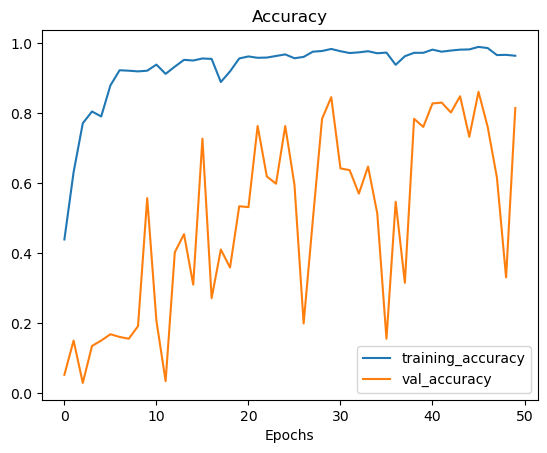

In [10]:
plot_loss_curves(history_4)

In [11]:
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score
from sklearn.metrics import f1_score
from sklearn.metrics import classification_report

pred = model_4.predict(test_data, batch_size=64)
pred = np.argmax(pred, axis=-1)

y_true = test_data.classes

#y_pred = np.rint(pred)
#labels = np.argmax(y_pred, axis=-1)

print(classification_report(y_true, pred, target_names=class_names))

7/7 [==============================] - 47s 6s/step
              precision    recall  f1-score   support

           A       0.15      0.14      0.14        49
           B       0.11      0.10      0.11        49
  Background       0.00      0.00      0.00        20
           C       0.17      0.33      0.22        58
           D       0.20      0.20      0.20        45
           E       0.13      0.10      0.11        50
           F       0.27      0.22      0.24        59
           G       0.14      0.09      0.11        58

    accuracy                           0.16       388
   macro avg       0.14      0.15      0.14       388
weighted avg       0.16      0.16      0.16       388



7/7 [==============================] - 45s 6s/step
Confusion Matrix
Normalized confusion matrix


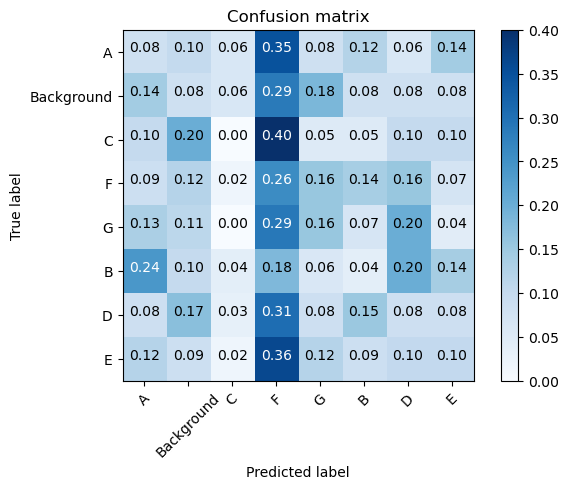

In [14]:
from sklearn.metrics import confusion_matrix
from collections import OrderedDict



Y_pred=model_4.predict(test_data)
y_pred=np.argmax(Y_pred,axis=1)
print('Confusion Matrix')
cm=confusion_matrix(test_data.classes,y_pred)
genres={'A':0, 'Background':1, 'C':2, 'F':3, 'G':4, 'B':5, 'D':6, 'E':7}
keys = OrderedDict(sorted(genres.items(), key=lambda t: t[1])).keys()

plot_confusion_matrix(cm,keys,normalize=True)
plt.show()

In [15]:
model_4.save_weights('model4_2_weights.h5')

In [24]:
model_5 = ResNet18(8)
model_5.build(input_shape = (None,224,224,1))


model_5.compile(optimizer = "adam",loss='categorical_crossentropy', metrics=["accuracy"]) 
model_5.summary()

Cause: mangled names are not yet supported
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
Cause: mangled names are not yet supported
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
Model: "res_net18"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_12 (Conv2D)          multiple                  3200      
                                                                 
 batch_normalization (BatchN  multiple                 256       
 ormalization)                                                   
                                                                 
 max_pooling2d_6 (MaxPooling  multiple                 0         
 2D)                                                             
                                                                 
 resnet_block (ResnetBlock)  multiple          

In [25]:
history_5 = model_5.fit(train_data_aug2, steps_per_epoch=len(train_data_aug2), epochs=50, validation_data=test_data2)

Epoch 1/50
25/25 [==============================] - 566s 23s/step - loss: 1.9259 - accuracy: 0.3497 - val_loss: 59.2010 - val_accuracy: 0.0518
Epoch 2/50
25/25 [==============================] - 658s 27s/step - loss: 1.1274 - accuracy: 0.5674 - val_loss: 63.1993 - val_accuracy: 0.0518
Epoch 3/50
25/25 [==============================] - 515s 21s/step - loss: 0.6503 - accuracy: 0.7655 - val_loss: 17.0359 - val_accuracy: 0.0518
Epoch 4/50
25/25 [==============================] - 713s 29s/step - loss: 0.5781 - accuracy: 0.7960 - val_loss: 21.5558 - val_accuracy: 0.0518
Epoch 5/50
25/25 [==============================] - 519s 22s/step - loss: 0.3759 - accuracy: 0.8731 - val_loss: 4.8809 - val_accuracy: 0.0764
Epoch 6/50
25/25 [==============================] - 517s 21s/step - loss: 0.3436 - accuracy: 0.8789 - val_loss: 11.8941 - val_accuracy: 0.0719
Epoch 7/50
25/25 [==============================] - 550s 22s/step - loss: 0.2702 - accuracy: 0.9093 - val_loss: 15.9702 - val_accuracy: 0.0576


In [26]:
model_5.evaluate(test_data2)

25/25 [==============================] - 202s 8s/step - loss: 0.0354 - accuracy: 0.9845


[0.03543031960725784, 0.984455943107605]

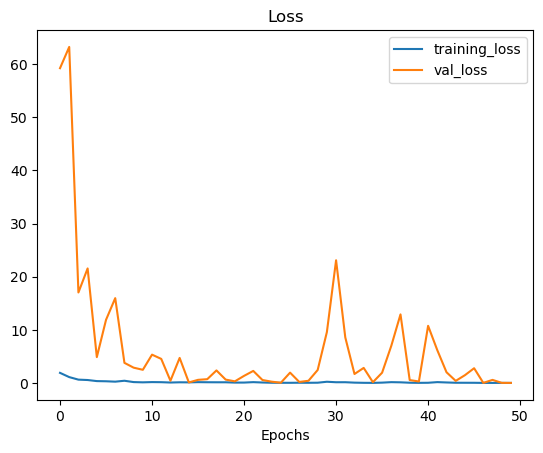

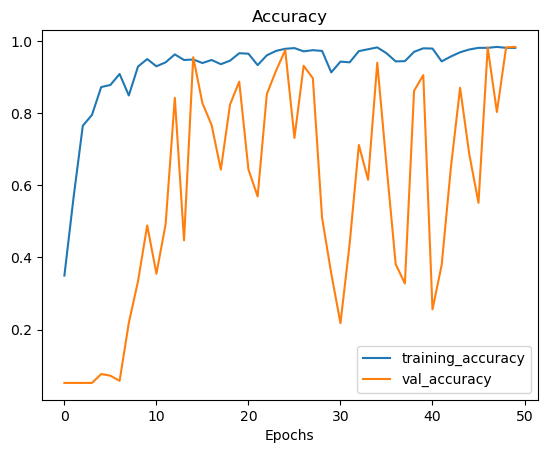

In [27]:
plot_loss_curves(history_5)

In [28]:
pred = model_5.predict(test_data2, batch_size=64)
pred = np.argmax(pred, axis=-1)

y_true = test_data2.classes

#y_pred = np.rint(pred)
#labels = np.argmax(y_pred, axis=-1)

print(classification_report(y_true, pred, target_names=class_names))

25/25 [==============================] - 204s 8s/step
              precision    recall  f1-score   support

           A       0.12      0.12      0.12       195
           B       0.19      0.19      0.19       195
  Background       0.04      0.04      0.04        80
           C       0.14      0.14      0.14       234
           D       0.08      0.08      0.08       180
           E       0.11      0.10      0.10       202
           F       0.16      0.16      0.16       236
           G       0.13      0.14      0.13       222

    accuracy                           0.13      1544
   macro avg       0.12      0.12      0.12      1544
weighted avg       0.13      0.13      0.13      1544



25/25 [==============================] - 198s 8s/step
Confusion Matrix
Normalized confusion matrix


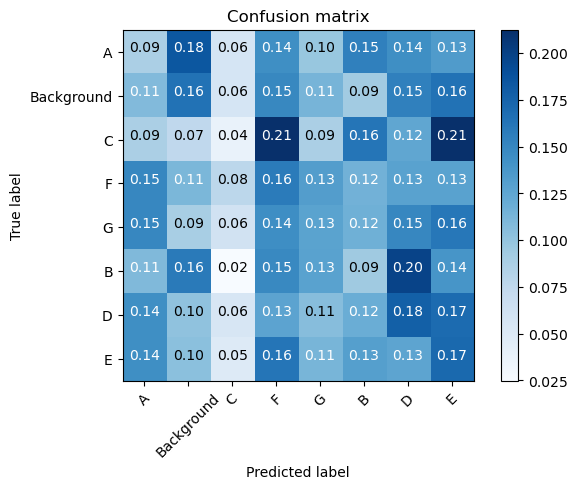

In [29]:
Y_pred=model_5.predict(test_data2)
y_pred=np.argmax(Y_pred,axis=1)
print('Confusion Matrix')
cm=confusion_matrix(test_data2.classes,y_pred)
genres={'A':0, 'Background':1, 'C':2, 'F':3, 'G':4, 'B':5, 'D':6, 'E':7}
keys = OrderedDict(sorted(genres.items(), key=lambda t: t[1])).keys()

plot_confusion_matrix(cm,keys,normalize=True)
plt.show()

In [30]:
model_5.save_weights('model5_weights.h5')

In [23]:
model_6 = Sequential([
    Normalization(),
    Conv2D(32, (5,5), activation='relu', input_shape=(224, 224, 3)), # filters, kernel_size
    Conv2D(32, (5,5), activation='relu'),
    MaxPool2D(), #pool_size=2, padding="valid"
    Dropout(0.1),
    Conv2D(32, (5,5), activation='relu'),
    Conv2D(32, (5,5), activation='relu'),
    MaxPool2D(), #2
    Dropout(0.1),
    Conv2D(32, (5,5), activation='relu'),
    Conv2D(32, (5,5), activation='relu'),
    MaxPool2D(),
    Dropout(0.1),
    Conv2D(32, (5,5), activation='relu'),
    Conv2D(32, (5,5), activation='relu'),
    AveragePooling2D(),
    Dropout(0.1),
    Flatten(),
    Dense(8, activation='softmax') # 7 is number of classes
])

# Compile the model
model_6.compile(loss="categorical_crossentropy",
               optimizer=tf.keras.optimizers.Adam(),
               metrics=["accuracy"])

In [ ]:
model_6.compile(loss="categorical_crossentropy",
               optimizer=tf.keras.optimizers.Adam(),
               metrics=["accuracy"])

In [26]:
history_6 = model_6.fit(train_data_aug3, 
                       epochs=25,
                       steps_per_epoch=len(train_data_aug3),
                       validation_data=test_data,
                       validation_steps=len(test_data))

Epoch 1/25
25/25 [==============================] - 607s 24s/step - loss: 2.0632 - accuracy: 0.1244 - val_loss: 2.0577 - val_accuracy: 0.1521
Epoch 2/25
25/25 [==============================] - 380s 15s/step - loss: 2.0527 - accuracy: 0.1522 - val_loss: 2.0478 - val_accuracy: 0.1521
Epoch 3/25
25/25 [==============================] - 380s 15s/step - loss: 2.0504 - accuracy: 0.1451 - val_loss: 2.0450 - val_accuracy: 0.1521
Epoch 4/25
25/25 [==============================] - 384s 15s/step - loss: 2.0474 - accuracy: 0.1516 - val_loss: 2.0450 - val_accuracy: 0.1521
Epoch 5/25
25/25 [==============================] - 390s 16s/step - loss: 2.0480 - accuracy: 0.1438 - val_loss: 2.0449 - val_accuracy: 0.1521
Epoch 6/25
25/25 [==============================] - 454s 18s/step - loss: 2.0485 - accuracy: 0.1516 - val_loss: 2.0455 - val_accuracy: 0.1521
Epoch 7/25
25/25 [==============================] - 390s 16s/step - loss: 2.0483 - accuracy: 0.1444 - val_loss: 2.0452 - val_accuracy: 0.1521
Epoch 

In [27]:
model_6.evaluate(test_data)

7/7 [==============================] - 47s 7s/step - loss: 2.0451 - accuracy: 0.1495


[2.045060396194458, 0.1494845300912857]

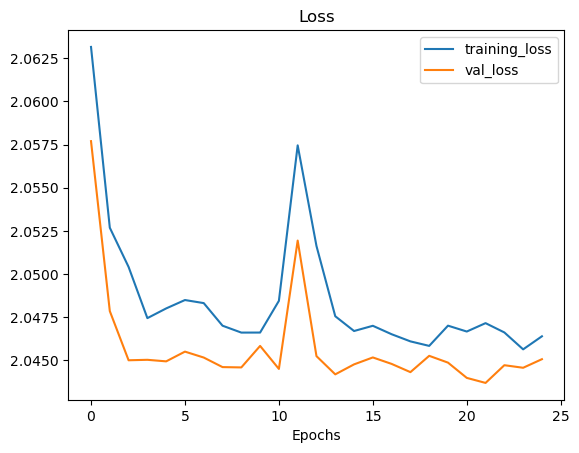

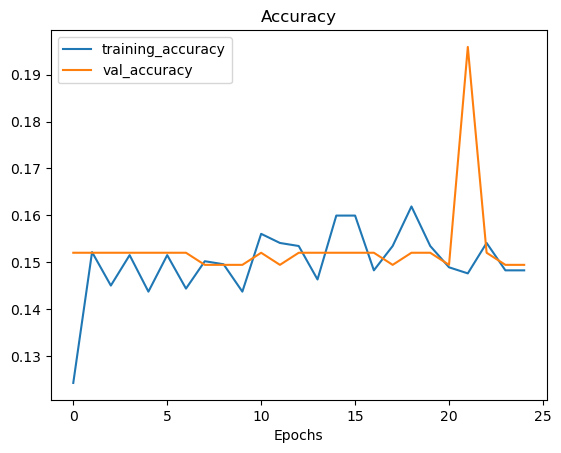

In [32]:
plot_loss_curves(history_6)

In [34]:
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score
from sklearn.metrics import f1_score
from sklearn.metrics import classification_report

pred = model_6.predict(test_data, batch_size=64)
pred = np.argmax(pred, axis=-1)

y_true = test_data.classes

#y_pred = np.rint(pred)
#labels = np.argmax(y_pred, axis=-1)

print(classification_report(y_true, pred, target_names=class_names))

7/7 [==============================] - 47s 7s/step
              precision    recall  f1-score   support

           A       0.00      0.00      0.00        49
           B       0.00      0.00      0.00        49
  Background       0.00      0.00      0.00        20
           C       0.15      1.00      0.26        58
           D       0.00      0.00      0.00        45
           E       0.00      0.00      0.00        50
           F       0.00      0.00      0.00        59
           G       0.00      0.00      0.00        58

    accuracy                           0.15       388
   macro avg       0.02      0.12      0.03       388
weighted avg       0.02      0.15      0.04       388



C:\Users\alexa\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\alexa\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\alexa\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


7/7 [==============================] - 49s 7s/step
Confusion Matrix
Normalized confusion matrix


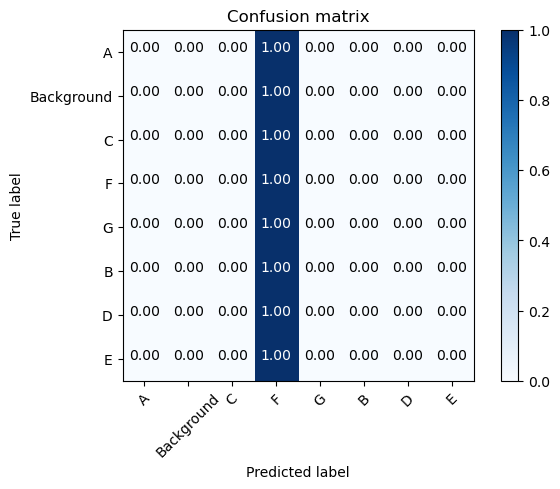

In [35]:
from sklearn.metrics import confusion_matrix
from collections import OrderedDict



Y_pred=model_6.predict(test_data)
y_pred=np.argmax(Y_pred,axis=1)
print('Confusion Matrix')
cm=confusion_matrix(test_data.classes,y_pred)
genres={'A':0, 'Background':1, 'C':2, 'F':3, 'G':4, 'B':5, 'D':6, 'E':7}
keys = OrderedDict(sorted(genres.items(), key=lambda t: t[1])).keys()

plot_confusion_matrix(cm,keys,normalize=True)
plt.show()